# Computer Vision Image analysis 

In [12]:
import requests
from io import BytesIO #16진수를 bite단위로 재구성하는 lib
from PIL import Image 

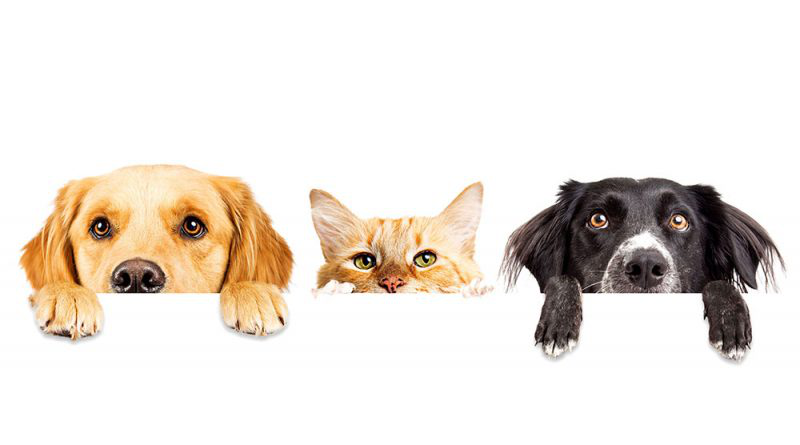

In [18]:
img_URL='https://thistime.ca/wp-content/uploads/2018/11/shutterstock_1034939470-800x445.jpg'
response = requests.get(img_URL)

#jupyter notebook 이미지 미리보기 
response.content # \x : text file이 아님  16진수
img=BytesIO(response.content)
image=Image.open(img)
image

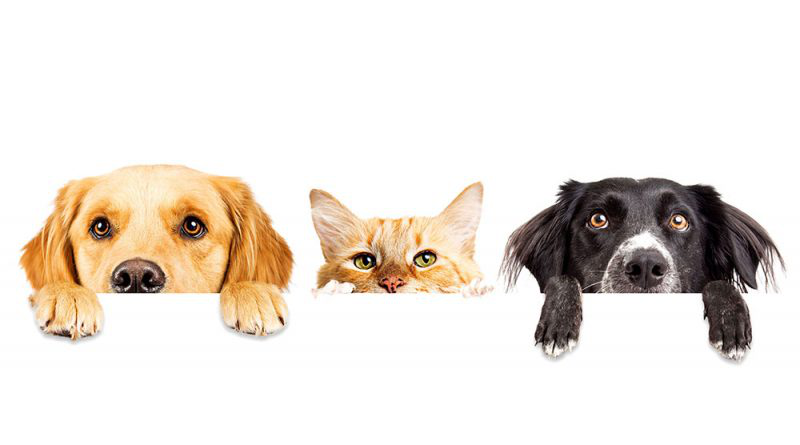

In [20]:
#위의 코드를 간편화
img_URL='https://thistime.ca/wp-content/uploads/2018/11/shutterstock_1034939470-800x445.jpg'
image=Image.open(BytesIO(requests.get(img_URL).content))
image

In [23]:
# 필요한 값들을 준비
key='08fc5d06c26044bc9d74761122abddad'
endpoint='https://labuser91computervision.cognitiveservices.azure.com/'+'vision/v2.0/'

In [25]:
analyze_endpoint=endpoint+'analyze' #이미지 분석
detect_endpoint=endpoint+'detect' #개체 감지

In [26]:
header={'Ocp-Apim-Subscription-Key': key}
params={'visualFeatures': 'Categories,Description,Color'}
data={'url':img_URL}

In [27]:
response= requests.post(analyze_endpoint, 
              headers=header,
              params=params,
              json=data)

In [28]:
result=response.json()
result

{'categories': [],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': 'BD740E',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['dog',
   'laying',
   'indoor',
   'brown',
   'looking',
   'sitting',
   'lying',
   'large',
   'cute',
   'resting',
   'table',
   'bed',
   'standing'],
  'captions': [{'text': 'a large brown dog lying down and looking at the camera',
    'confidence': 0.8205262819883716}]},
 'requestId': 'f7d6f53f-3e5a-4f49-b31a-0928f97093bc',
 'metadata': {'height': 445, 'width': 800, 'format': 'Jpeg'}}